# Resampling and Penalized Model
Data : bankloan.csv
- Build a logistic regression model
    - Target : default
    - Features : employ, debtinc, creddebt, othdebt
- Explore the class distribution
- Random state 2020, stratified training 60%, validation 20%, testing 20%
- Modeling evaluate by f1 score
    - Logistic regression without any treatment
    - Logistic regression that optimized by the threshold
    - Logistic regression with random undersampling
    - Penalized logistic regression


> ## Library and Data

In [1]:
!pip install imblearn

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, f1_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
bankloan = pd.read_csv(r'C:\Users\user\Documents\Data Science\MODUL 3\What is Classification_\bankloan.csv')
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [8]:
bankloan['default'].value_counts()/bankloan.shape[0]

0    0.738571
1    0.261429
Name: default, dtype: float64

> ## Data Splitting
60 train, 20 validation, 20 test

In [9]:
x = bankloan[['employ', 'debtinc', 'creddebt', 'othdebt']]
y = bankloan['default']

In [12]:
x_trainval, x_test, y_trainval, y_test = train_test_split(x,
                                                         y,
                                                         stratify = y,
                                                         test_size = 140,
                                                         random_state = 2020)

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_trainval,
                                                  y_trainval,
                                                  stratify = y_trainval,
                                                  test_size = 140,
                                                  random_state = 2020)

1. Logistic 
2. Logistic optimize threshold
3. Logistic with random undersampling
4. Penalized logistic

> ## Logistic

In [14]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [15]:
y_pred = model.predict(x_val)
print(classification_report(y_val, y_pred)) # threshold = 0.5

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       104
           1       0.67      0.50      0.57        36

    accuracy                           0.81       140
   macro avg       0.75      0.71      0.72       140
weighted avg       0.80      0.81      0.80       140



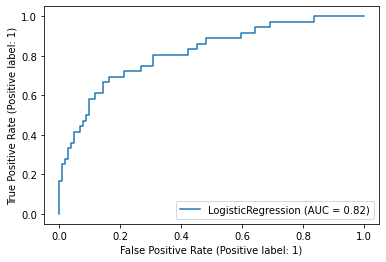

In [16]:
plot_roc_curve(model, x_val, y_val)

> ## Logistic optimize threshold

In [19]:
th_value = [i/100 for i in range(20, 61)]
score = 0 
score_list = []

for i in th_value:
    # score calculation
    y_prob = model.predict_proba(x_val)[:, 1]
    y_pred = np.where(y_prob > i, 1, 0)
    score_temp = f1_score(y_val, y_pred)
    
    # score result
    score_list.append(score_temp)
    
    # choose best score
    if score_temp > score:
        score = score_temp
        best_th = i

In [22]:
print('best f1 score :', score)
print('best threshold : ', best_th)

best f1 score : 0.64
best threshold :  0.4


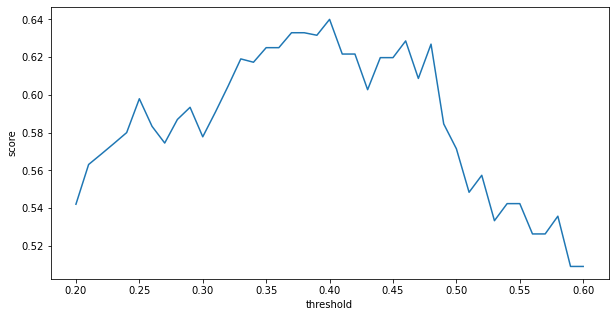

In [25]:
plt.figure(figsize = (10, 5))
sns.lineplot(th_value, score_list)
plt.xlabel('threshold')
plt.ylabel('score')
plt.show()

> ## Logistic with Random Undersampling

In [26]:
rus = RandomUnderSampler()
x_under, y_under = rus.fit_resample(x_train, y_train)

In [29]:
len(x_under)

220

In [30]:
len(x_train)

420

In [31]:
model_rus = LogisticRegression()
model_rus.fit(x_under, y_under)

LogisticRegression()

In [32]:
y_pred = model_rus.predict(x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       104
           1       0.49      0.81      0.61        36

    accuracy                           0.74       140
   macro avg       0.70      0.76      0.71       140
weighted avg       0.81      0.74      0.75       140



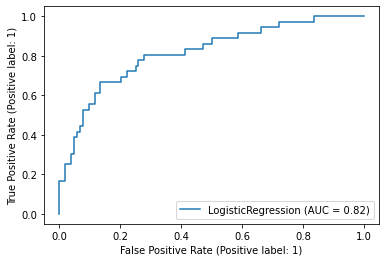

In [33]:
plot_roc_curve(model_rus, x_val, y_val)

> ## Penalized Logistic Regression

In [34]:
model_balanced = LogisticRegression(class_weight = 'balanced')
model_balanced.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [35]:
y_pred = model_balanced.predict(x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       104
           1       0.48      0.81      0.60        36

    accuracy                           0.72       140
   macro avg       0.69      0.75      0.69       140
weighted avg       0.80      0.72      0.74       140



> ## Final Model Performance : Logistic optimiezed threshold

In [37]:
model = LogisticRegression()
model.fit(x_trainval, y_trainval)

LogisticRegression()

In [39]:
y_prob = model.predict_proba(x_test)[:, 1]
y_pred = np.where(y_prob > best_th, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.54      0.54      0.54        37

    accuracy                           0.76       140
   macro avg       0.69      0.69      0.69       140
weighted avg       0.76      0.76      0.76       140

